In [14]:
from glob import glob
import chess
import numpy as np
from tqdm import tqdm

In [15]:
dataset = glob("/mnt/c/datasets/eval-1700/*.csv")
dataset

['/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-01.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-02.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-03.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-04.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-05.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-06.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-07.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-08.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-09.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-10.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-11.csv',
 '/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-12.csv']

In [16]:
king_sq = np.zeros((64), dtype=np.uint64)

In [17]:
piece_locations = np.zeros((6, 64), dtype=np.uint64)

k = 0

for path in dataset:
    print(path)
    with open(path) as f:
        for line in tqdm(f):
            fen, score, bestmove = line.split(",")
            board = chess.Board(fen)

            for b in [board, board.mirror()]:
                for pt in chess.PIECE_TYPES:
                    for p in b.pieces(pt, chess.WHITE):
                        piece_locations[pt - 1][p] += 1

            if k > 1000000:
                break
            k += 1
with open("piece_locations.csv", "w") as f:
    for pt in chess.PIECE_TYPES:
        f.write(",".join([str(x) for x in piece_locations[pt - 1].tolist()]) + "\n")

/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-01.csv


1000001it [01:13, 13638.84it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-02.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-03.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-04.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-05.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-06.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-07.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-08.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-09.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-10.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-11.csv


0it [00:00, ?it/s]


/mnt/c/datasets/eval-1700/lichess_db_standard_rated_2023-12.csv


0it [00:00, ?it/s]


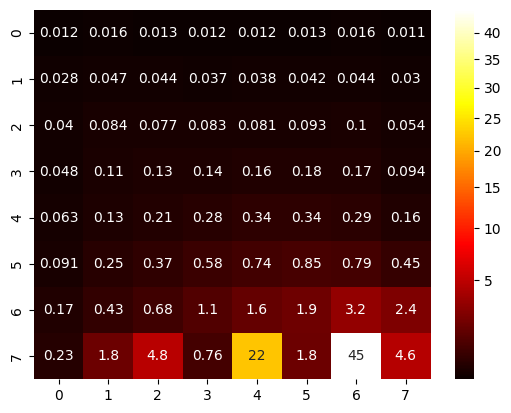

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# with sns
counts = np.flipud(piece_locations[chess.KING - 1].reshape((8,8)))
counts = counts / counts.sum() * 100
sns.heatmap(counts, cmap='hot',annot=True, norm=matplotlib.colors.PowerNorm(gamma=0.6))
plt.show()